In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import warnings
warnings.simplefilter('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

df = pd.read_csv('Sky.csv')
df.drop(df[df['class']=='STAR'].index, inplace=True)
df['class'].loc[(df['class'] == 'GALAXY')] = 1
df['class'].loc[(df['class'] == 'QSO')] = -1
X = df.drop(['ra', 'dec','objid','specobjid','class','fiberid','run', 'rerun', 'camcol','plate', 'mjd','field'], axis = 1)

stand_X = pd.DataFrame(preprocessing.scale(X),columns = X.columns)
#target = pd.DataFrame(df['class']) 
#train = pd.DataFrame(X.drop(['class'], axis = 1))
#X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.3, train_size = 0.7, random_state = 42) 
#X_train.shape

from sklearn.decomposition import PCA, KernelPCA
for i in [1,2,3,4,5]:
    pca = PCA(n_components=i)
    pca.fit(stand_X)
    print(sum(pca.explained_variance_ratio_))

0.7844699197022946
0.9380964619254015
0.9963525353610825
0.998724914493451
0.9995501104724875


In [9]:
len(stand_X)

5848

In [12]:
pca = PCA(n_components=3)
pca.fit(stand_X)
X3 = pca.transform(stand_X)
X3
df3 = pd.DataFrame(data=X3, columns=["PC1", "PC2", "PC3"])
df3['Y'] = 0
for i in range (5848):
    df3.at[i,'Y'] = df['class'].iloc[i]
df3.head()

,PC1,PC2,PC3,Y
0,-1.132201,-0.786970,0.038983,1
1,-0.475027,-0.829110,-0.225381,1
2,-0.749563,-0.051624,0.942112,1
3,0.407456,-0.767263,-0.464426,1
4,-2.460187,0.180580,1.206223,-1


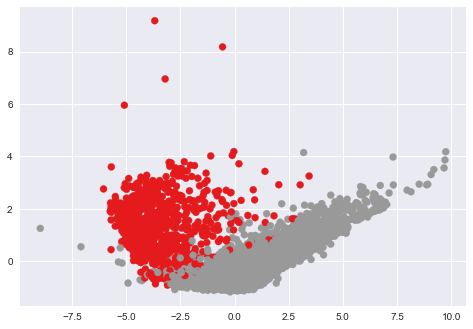

In [17]:
plt.scatter('PC1', 'PC2', c='Y', cmap = 'Set1', data=df3)

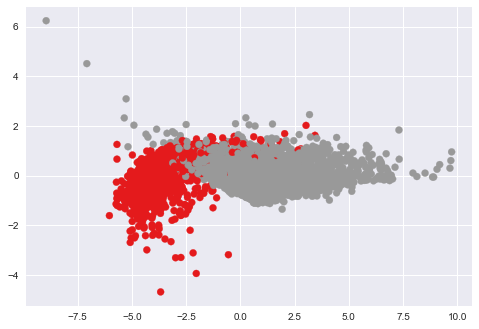

In [18]:
plt.scatter('PC1', 'PC3', c='Y', cmap = 'Set1', data=df3)

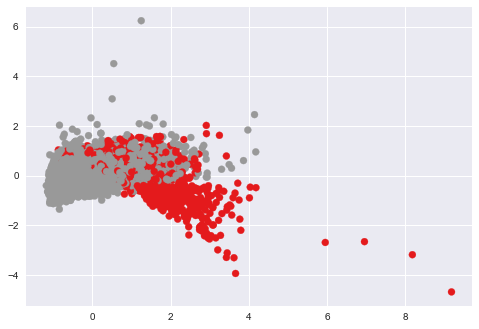

In [19]:
plt.scatter('PC2', 'PC3', c='Y', cmap = 'Set1', data=df3)

In [23]:
pca = KernelPCA(kernel="rbf", n_components=3)
pca.fit(stand_X)
X3 = pca.transform(stand_X)
X3
df3 = pd.DataFrame(data=X3, columns=["PC1", "PC2", "PC3"])
df3['Y'] = 0
for i in range (5848):
    df3.at[i,'Y'] = df['class'].iloc[i]
df3.head()

,PC1,PC2,PC3,Y
0,-0.551621,0.117027,-0.133408,1
1,-0.441421,-0.162139,0.049527,1
2,-0.399688,0.109527,-0.276971,1
3,-0.102508,-0.412952,0.260179,1
4,-0.208859,0.639295,-0.113267,-1


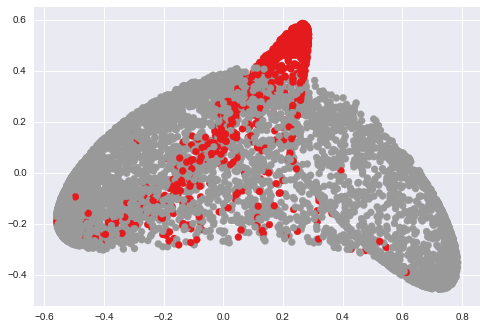

In [24]:
plt.scatter('PC1', 'PC3', c='Y', cmap = 'Set1', data=df3)

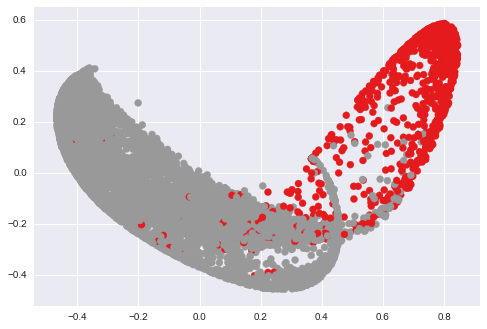

In [25]:
plt.scatter('PC2', 'PC3', c='Y', cmap = 'Set1', data=df3)

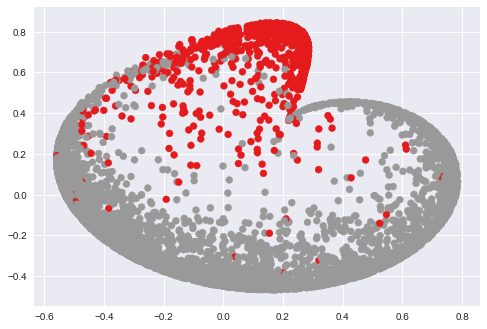

In [26]:
plt.scatter('PC1', 'PC2', c='Y', cmap = 'Set1', data=df3)

In [2]:
pca = PCA(n_components=3)
pca.fit(stand_X)
X3 = pca.transform(stand_X)
X3
df3 = pd.DataFrame(data=X3, columns=["PC1", "PC2", "PC3"])
df3['Y'] = 0
for i in range (5848):
    df3.at[i,'Y'] = df['class'].iloc[i]
df3.head()


,PC1,PC2,PC3,Y
0,-1.132201,-0.786970,0.038983,1
1,-0.475027,-0.829110,-0.225381,1
2,-0.749563,-0.051624,0.942112,1
3,0.407456,-0.767263,-0.464426,1
4,-2.460187,0.180580,1.206223,-1


In [5]:
from sklearn import tree
from sklearn.metrics import f1_score
target = pd.DataFrame(df3['Y']) 
train = pd.DataFrame(df3.drop(['Y'], axis = 1))
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.3, train_size = 0.7, random_state = 42) 
X_train.shape
clf = tree.DecisionTreeClassifier(max_depth=10, random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9783475783475784

In [6]:
y_pred = clf.predict(X_test)
f1_score(y_test, y_pred, average='macro')

0.9553896333240577

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
parameters = {
"loss":["deviance"],
"learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
"min_samples_split": np.linspace(0.1, 0.5, 12),
"min_samples_leaf": np.linspace(0.1, 0.5, 12),
"max_depth":[3,5,8],
"max_features":["log2","sqrt"],
"criterion": ["friedman_mse",  "mae"],
"subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
"n_estimators":[10]
}

clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10, n_jobs=-1)

clf.fit(X_train, y_train)

y_pred = сlf.predict(X_test)
    # Print the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))

    # Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_pred, digits=3))